In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')
sorted(df.columns)

['2nd Largest Property Use - Gross Floor Area (ft²)',
 '2nd Largest Property Use Type',
 '3rd Largest Property Use Type',
 '3rd Largest Property Use Type - Gross Floor Area (ft²)',
 'Address 1 (self-reported)',
 'Address 2',
 'BBL - 10 digits',
 'Borough',
 'Census Tract',
 'Community Board',
 'Council District',
 'DOF Benchmarking Submission Status',
 'DOF Gross Floor Area',
 'Diesel #2 Use (kBtu)',
 'Direct GHG Emissions (Metric Tons CO2e)',
 'District Steam Use (kBtu)',
 'ENERGY STAR Score',
 'Electricity Use - Grid Purchase (kBtu)',
 'Fuel Oil #1 Use (kBtu)',
 'Fuel Oil #2 Use (kBtu)',
 'Fuel Oil #4 Use (kBtu)',
 'Fuel Oil #5 & 6 Use (kBtu)',
 'Indirect GHG Emissions (Metric Tons CO2e)',
 'Largest Property Use Type',
 'Largest Property Use Type - Gross Floor Area (ft²)',
 'Latitude',
 'List of All Property Use Types at Property',
 'Longitude',
 'Metered Areas  (Water)',
 'Metered Areas (Energy)',
 'NTA',
 'NYC Borough, Block and Lot (BBL) self-reported',
 'NYC Building Identificati

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

In [4]:
for column in df.columns:
    print(column)
    print(df[column].value_counts())
    print()

Order
1        1
9566     1
9568     1
9576     1
9577     1
        ..
4479     1
4480     1
4481     1
4482     1
14993    1
Name: Order, Length: 11746, dtype: int64

Property Id
13286      1
4400665    1
4125396    1
2830973    1
4043095    1
          ..
3526401    1
4803003    1
4398358    1
2811408    1
4952165    1
Name: Property Id, Length: 11746, dtype: int64

Property Name
Clinton West Condominium           2
Main Hospital                      2
Jetro Cash && Carry                2
East Building                      2
Fairchild                          2
                                  ..
E61                                1
Lawrence - 300 East 62nd Street    1
AKAM - 350 East 62nd Street        1
301 E 62 St.                       1
Tryad: 420 Clinton Ave             1
Name: Property Name, Length: 11740, dtype: int64

Parent Property Id
Not Applicable: Standalone Property    11324
3612678                                   57
3616399                                   33
498

In [3]:
df_check = df[['Postal Code', 'Borough', 'DOF Gross Floor Area', 'Primary Property Type - Self Selected', 
 'Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built', 'Number of Buildings - Self-reported',
 'Occupancy', 'Metered Areas (Energy)', 'Metered Areas  (Water)', 'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
 'Weather Normalized Site Electricity Intensity (kWh/ft²)', 'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
 'Weather Normalized Source EUI (kBtu/ft²)', 'Weather Normalized Site Natural Gas Use (therms)', 'Electricity Use - Grid Purchase (kBtu)',
 'Weather Normalized Site Electricity (kWh)', 'Total GHG Emissions (Metric Tons CO2e)', 'Direct GHG Emissions (Metric Tons CO2e)', 
 'Indirect GHG Emissions (Metric Tons CO2e)', 'Property GFA - Self-Reported (ft²)', 'Source EUI (kBtu/ft²)', 'Water Required?',
 'Community Board', 'Council District', 'Census Tract', 'NTA', 'ENERGY STAR Score']]

df_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 29 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Postal Code                                                 11746 non-null  object 
 1   Borough                                                     11628 non-null  object 
 2   DOF Gross Floor Area                                        11628 non-null  float64
 3   Primary Property Type - Self Selected                       11746 non-null  object 
 4   Largest Property Use Type - Gross Floor Area (ft²)          11746 non-null  object 
 5   Year Built                                                  11746 non-null  int64  
 6   Number of Buildings - Self-reported                         11746 non-null  int64  
 7   Occupancy                                                   11746 non-null  int64  
 

In [4]:
cat_col = ['Postal Code', 'Borough', 'Primary Property Type - Self Selected', 'Metered Areas (Energy)', 
          'Metered Areas  (Water)', 'Water Required?', 'NTA']
prepr_col = ['Largest Property Use Type - Gross Floor Area (ft²)', 
             'Site EUI (kBtu/ft²)',
             'Weather Normalized Site EUI (kBtu/ft²)', 
             'Weather Normalized Site Electricity Intensity (kWh/ft²)',
             'Weather Normalized Site Natural Gas Intensity (therms/ft²)', 
             'Weather Normalized Source EUI (kBtu/ft²)',
             'Weather Normalized Site Natural Gas Use (therms)', 
             'Electricity Use - Grid Purchase (kBtu)',
             'Weather Normalized Site Electricity (kWh)', 
             'Total GHG Emissions (Metric Tons CO2e)', 
             'Direct GHG Emissions (Metric Tons CO2e)', 
             'Indirect GHG Emissions (Metric Tons CO2e)',
             'Source EUI (kBtu/ft²)']
num_col = [i for i in df_check.columns if i not in cat_col and i not in prepr_col and i != 'ENERGY STAR Score']
num_col

['DOF Gross Floor Area',
 'Year Built',
 'Number of Buildings - Self-reported',
 'Occupancy',
 'Property GFA - Self-Reported (ft²)',
 'Community Board',
 'Council District',
 'Census Tract']

In [7]:
def str_to_float(column, df):
    df = df.copy()
    df[column].replace({'Not Available': np.nan, 'nan': np.nan, 'NaN': np.nan}, inplace=True)
    return df[column].astype(float).fillna(method='ffill')

def to_str(column, df):
    df = df.copy()
    return df[column].astype(str).fillna(method='ffill')

def to_int(column, df):
    df = df.copy()
    return df[column].astype(float).fillna(method='ffill')

In [5]:
prepr_col + num_col

['Largest Property Use Type - Gross Floor Area (ft²)',
 'Site EUI (kBtu/ft²)',
 'Weather Normalized Site EUI (kBtu/ft²)',
 'Weather Normalized Site Electricity Intensity (kWh/ft²)',
 'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
 'Weather Normalized Source EUI (kBtu/ft²)',
 'Weather Normalized Site Natural Gas Use (therms)',
 'Electricity Use - Grid Purchase (kBtu)',
 'Weather Normalized Site Electricity (kWh)',
 'Total GHG Emissions (Metric Tons CO2e)',
 'Direct GHG Emissions (Metric Tons CO2e)',
 'Indirect GHG Emissions (Metric Tons CO2e)',
 'Source EUI (kBtu/ft²)',
 'DOF Gross Floor Area',
 'Year Built',
 'Number of Buildings - Self-reported',
 'Occupancy',
 'Property GFA - Self-Reported (ft²)',
 'Community Board',
 'Council District',
 'Census Tract']

In [8]:
for col in prepr_col:
    df_check.loc[:, col] = str_to_float(col, df_check).values

for col in cat_col:
    df_check.loc[:, col] = to_str(col, df_check).values
    
for col in num_col:
    # print(col)
    df_check.loc[:, col] = str_to_float(col, df_check).values
    
df_check.info()

C:\Users\Nikolai\AppData\Local\Temp\ipykernel_16340\1374708914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_check.loc[:, col] = str_to_float(col, df_check).values
C:\Users\Nikolai\AppData\Local\Temp\ipykernel_16340\1374708914.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_check.loc[:, col] = to_str(col, df_check).values
C:\Users\Nikolai\AppData\Local\Temp\ipykernel_16340\1374708914.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 29 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Postal Code                                                 11746 non-null  object 
 1   Borough                                                     11746 non-null  object 
 2   DOF Gross Floor Area                                        11746 non-null  float64
 3   Primary Property Type - Self Selected                       11746 non-null  object 
 4   Largest Property Use Type - Gross Floor Area (ft²)          11746 non-null  float64
 5   Year Built                                                  11746 non-null  float64
 6   Number of Buildings - Self-reported                         11746 non-null  float64
 7   Occupancy                                                   11746 non-null  float64
 

In [9]:
df_check['Weather Normalized Site Natural Gas Use (therms)'] = df_check['Weather Normalized Site Natural Gas Use (therms)'].fillna(0)
df_check['Weather Normalized Site Natural Gas Intensity (therms/ft²)'] = df_check['Weather Normalized Site Natural Gas Intensity (therms/ft²)'].fillna(0)
df_check[df_check['Weather Normalized Site Natural Gas Use (therms)'] != df_check['Weather Normalized Site Natural Gas Use (therms)']]
# df_check['Community Board'].value_counts()

C:\Users\Nikolai\AppData\Local\Temp\ipykernel_412\937221588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_check['Weather Normalized Site Natural Gas Use (therms)'] = df_check['Weather Normalized Site Natural Gas Use (therms)'].fillna(0)
C:\Users\Nikolai\AppData\Local\Temp\ipykernel_412\937221588.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_check['Weather Normalized Site Natural Gas Intensity (therms/ft²)'] = df_check['Weather Normalized Site Natural Gas Intensity (therms/ft²)'].fillna(0)


,Postal Code,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),...,Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Source EUI (kBtu/ft²),Water Required?,Community Board,Council District,Census Tract,NTA,ENERGY STAR Score


In [10]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split

cat = CatBoostRegressor(
    thread_count=4,
    depth=5,
    n_estimators=1000,
    loss_function='RMSE',
    verbose=35
    # use_best_model=True,
    # task_type="GPU"
)

In [11]:
df_train = df_check[df_check['ENERGY STAR Score'] != 'Not Available']
df_pred = df_check[df_check['ENERGY STAR Score'] == 'Not Available']

In [12]:
df_train_x = df_train.copy()
df_train_y = df_train_x.pop('ENERGY STAR Score')
X_train, X_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.33, random_state=42)
df_pool_train = Pool(X_train, y_train, cat_features=cat_col)
df_pool_test = Pool(X_test, y_test, cat_features=cat_col)

In [13]:
params = {
          'iterations': [800, 1000],
          'learning_rate':[0.3, 0.1], 
          'l2_leaf_reg':[5, 9]
          }

cat.grid_search(params, df_pool_train, cv=2, plot=True) 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 49.3536769	test: 48.6404463	best: 48.6404463 (0)	total: 167ms	remaining: 2m 13s
35:	learn: 12.6320691	test: 13.8544011	best: 13.8544011 (35)	total: 1.18s	remaining: 25.1s
70:	learn: 11.7940850	test: 13.6150133	best: 13.6150133 (70)	total: 2.17s	remaining: 22.3s
105:	learn: 11.2889073	test: 13.5945628	best: 13.5945628 (105)	total: 3.2s	remaining: 20.9s
140:	learn: 10.7882055	test: 13.5657014	best: 13.5610603 (111)	total: 4.28s	remaining: 20s
175:	learn: 10.2901515	test: 13.5519916	best: 13.5332741 (168)	total: 5.31s	remaining: 18.8s
210:	learn: 9.9221566	test: 13.5797128	best: 13.5332741 (168)	total: 6.35s	remaining: 17.7s
245:	learn: 9.5628404	test: 13.6148008	best: 13.5332741 (168)	total: 7.42s	remaining: 16.7s
280:	learn: 9.2581094	test: 13.6323471	best: 13.5332741 (168)	total: 8.47s	remaining: 15.7s
315:	learn: 8.9814683	test: 13.6588028	best: 13.5332741 (168)	total: 9.54s	remaining: 14.6s
350:	learn: 8.7404830	test: 13.6482369	best: 13.5332741 (168)	total: 10.6s	remaining

CatBoostError: only one of the parameters iterations, n_estimators, num_boost_round, num_trees should be initialized.

In [17]:
cat.fit(df_train_x, 
        df_train_y,
        verbose=35,
        cat_features=cat_col,
        plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 29.7912649	total: 50.5ms	remaining: 40.4s
35:	learn: 24.0815183	total: 1.8s	remaining: 38.1s
70:	learn: 20.2546275	total: 3.25s	remaining: 33.4s
105:	learn: 17.8203853	total: 4.5s	remaining: 29.4s
140:	learn: 16.2818490	total: 5.76s	remaining: 26.9s
175:	learn: 15.2896741	total: 7s	remaining: 24.8s
210:	learn: 14.6404180	total: 8.26s	remaining: 23.1s
245:	learn: 14.2024870	total: 9.54s	remaining: 21.5s
280:	learn: 13.9055183	total: 10.8s	remaining: 20s
315:	learn: 13.6887993	total: 12.2s	remaining: 18.7s
350:	learn: 13.5317808	total: 13.5s	remaining: 17.3s
385:	learn: 13.4100253	total: 14.8s	remaining: 15.8s
420:	learn: 13.3090387	total: 15.9s	remaining: 14.3s
455:	learn: 13.2266969	total: 17s	remaining: 12.9s
490:	learn: 13.1637204	total: 18.2s	remaining: 11.5s
525:	learn: 13.1147421	total: 19.4s	remaining: 10.1s
560:	learn: 13.0678881	total: 20.4s	remaining: 8.7s
595:	learn: 13.0207127	total: 21.5s	remaining: 7.36s
630:	learn: 12.9805568	total: 22.8s	remaining: 6.11s
665:	l

In [93]:
df_pred.pop('ENERGY STAR Score')
predict = cat.predict(df_pred)

array([ 1.35039484, 36.95298129, 33.16752856, ..., 51.96593774,
       88.87384633, 31.61468863])

(array([24.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([ 0.12612242,  3.76558989,  7.40505737, 11.04452484, 14.68399232,
        18.32345979, 21.96292726, 25.60239474, 29.24186221, 32.88132969,
        36.52079716]),
 <BarContainer object of 10 artists>)

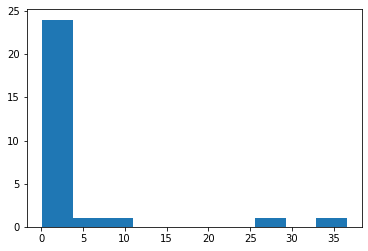

In [98]:
import matplotlib.pyplot as plt

plt.hist(cat.feature_importances_)

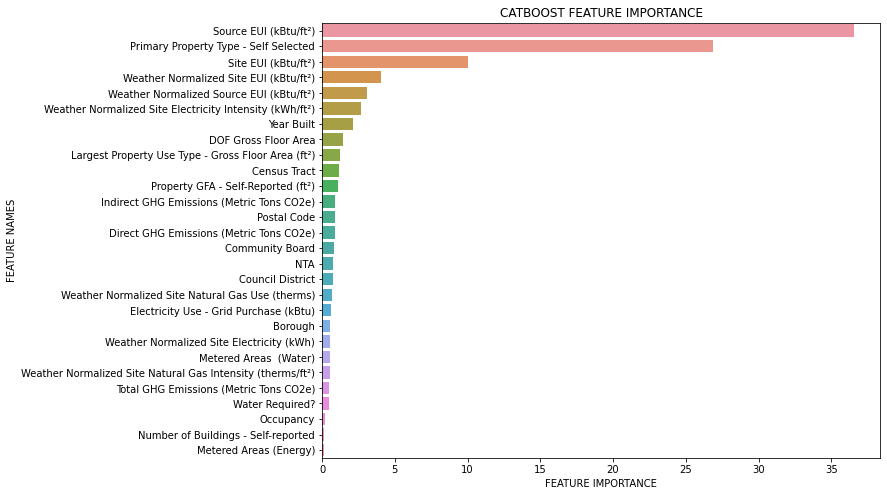

In [103]:
def plot_feature_importance(importance, names, model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
plot_feature_importance(cat.get_feature_importance(), df_train_x.columns, 'CATBOOST')

In [95]:
df.loc[df['ENERGY STAR Score'] == 'Not Available', 'ENERGY STAR Score'] = predict
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 